In [22]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
rec_file = 'D:\\Semester 5\\Time Series\\sleep-edf-database-1.0.0\\sleep-edf-database-1.0.0\\sc4002e0.rec'
f = pyedflib.EdfReader(rec_file)
num_channels = f.signals_in_file
channel_labels = f.getSignalLabels()

print(num_channels)
print(channel_labels)

7
['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG Submental', 'Temp body', 'Event marker']


In [3]:
eeg_data = []

for i in range(num_channels):
    signal = f.readSignal(i)
    eeg_data.append(signal)

f.close()
print(eeg_data)

for i in range(num_channels):
    print(len(eeg_data[i]))

[array([-48.93742275,  -8.71682307, -32.5463035 , ...,  27.22783246,
        51.26092927,   0.50318151]), array([  0.06454566,  -3.27241932,  -1.21135271, ..., -24.37381552,
       -26.04843214,   1.00306706]), array([ 34.99130236,  39.33096818,  52.34996567, ...,  61.99366751,
       120.33806363,   0.51506828]), array([-0.30597333,  0.30258178, -0.25372143, ...,  0.08327287,
        0.07056569,  0.01173994]), array([4.02398352, 3.98204486, 4.11395056, ..., 4.37603845, 4.44796612,
       0.96705745]), array([37.50614628, 37.48824463, 37.5080053 , ..., 35.67542659,
       35.63590524, 36.99532943]), array([1.10999435, 1.11285664, 1.13856657, ..., 1.2857084 , 1.29571374,
       0.67001266])]
8490000
8490000
8490000
84900
84900
84900
84900


In [4]:
rec_file1 = 'D:\\Semester 5\\Time Series\\sleep-edf-database-1.0.0\\sleep-edf-database-1.0.0\\sc4002e0.hyp'
f1 = pyedflib.EdfReader(rec_file1)
num_channels1 = f1.signals_in_file
channel_labels1 = f1.getSignalLabels()

print(num_channels1)
print(channel_labels1)

signal1 = f1.readSignal(0)
f1.close()
print(signal1)
print(len(signal1))
print(np.unique(signal1))


1
['Hypnogram']
[0. 0. 0. ... 0. 0. 9.]
2831
[0. 1. 2. 3. 4. 5. 6. 9.]


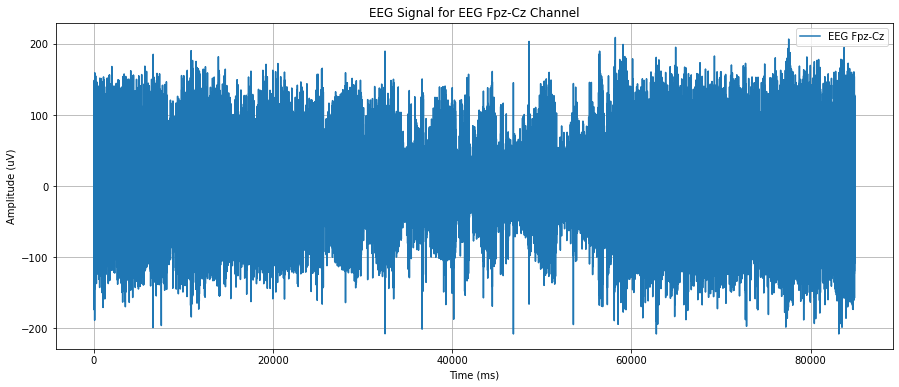

In [13]:
# Create a time vector (assuming a sample rate of 1000 Hz)
sample_rate = 100
num_samples = len(eeg_data[0])
time_vector = np.arange(num_samples) / sample_rate

plt.figure(figsize=(15, 6))
plt.plot(time_vector, eeg_data[0], label='EEG Fpz-Cz')
plt.title("EEG Signal for EEG Fpz-Cz Channel")
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (uV)')
plt.grid()
plt.legend()
plt.show()

In [14]:
def divide_chunks(l, n): 
    for i in range(0, len(l), n):  
        yield l[i:i + n]

In [16]:
x = list(divide_chunks(eeg_data[0],3000)) 
print(len(x))
x

2830


[array([-48.93742275,  -8.71682307, -32.5463035 , ...,  27.94048981,
        -28.27035935, -14.51989014]),
 array([-54.84229801, -67.37106889, -54.84229801, ..., -15.43616388,
        -16.75967041, -10.04032959]),
 array([-2.60833143, -1.18301671,  4.52460517, ...,  8.29150835,
         3.50652323, 18.87956054]),
 array([-22.56273747,   2.08120851,  14.09457542, ...,  -2.81194781,
         39.96021973,  10.02224765]),
 array([11.14213779, 20.50849165, 10.9385214 , ..., 32.32460517,
        32.32460517, 31.00109865]),
 array([29.98301671, 28.55770199, 30.59386587, ..., 78.45008011,
        90.77523461, 84.25951019]),
 array([74.78498512, 67.45479515, 69.08372625, ..., 14.90904097,
        -3.83002976, -4.8481117 ]),
 array([ -0.77578393,  -4.44087892, -10.04032959, ...,  -6.37523461,
         -3.21918059,   3.20109865]),
 array([  3.50652323,   2.3866331 ,  -1.99748226, ..., -68.08372625,
        -39.16383612, -39.57106889]),
 array([-63.19693294, -30.8155642 , -28.57578393, ..., -22.05

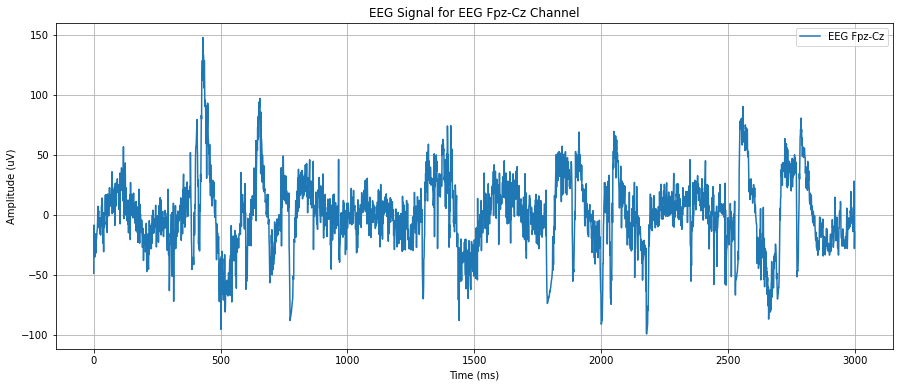

In [20]:
time_vector1 = np.arange(0,3000)
plt.figure(figsize=(15, 6))
plt.plot(time_vector1, x[0], label='EEG Fpz-Cz')
plt.title("EEG Signal for EEG Fpz-Cz Channel")
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (uV)')
plt.grid()
plt.legend()
plt.show()

Shape of pwvd matrix:  (255, 3000)
Length of Time Array:  (3000,)
Length of Frequency Array:  (255,)


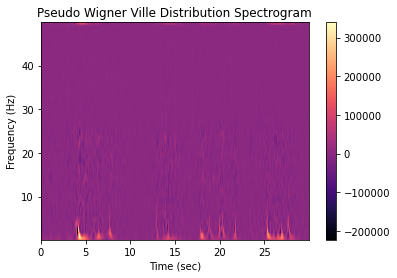

In [27]:
import neurokit2 as nk

f, t, spw = nk.signal_timefrequency(x[0], sampling_rate=100, method='pwvd')
print("Shape of pwvd matrix: ", spw.shape)
print("Length of Time Array: ", t.shape)
print("Length of Frequency Array: ", f.shape)

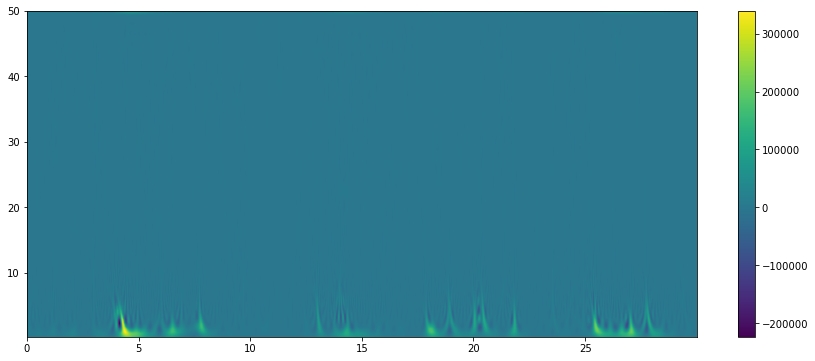

In [38]:
plt.figure(figsize=(15, 6))
plt.imshow(spw, extent=[t.min(),t.max(),f.min(),50], aspect='auto', origin='lower')
plt.colorbar()

In [30]:
print("PWVD Matrix: ", spw, "\n")
print("Time Array: ", t, "\n")
print("Frequency Array: ", f)

PWVD Matrix:  [[2535.50782604 3688.66988494 5533.27307088 ... 1313.04645798
  2373.19028442  745.03696641]
 [2535.50782604 3661.20646794 5525.6835628  ... 1301.28287205
  2426.060623    745.03696641]
 [2535.50782604 3631.62656392 5509.05016429 ... 1288.87064793
  2478.49490356  745.03696641]
 ...
 [2535.50782604 3777.04715116 5473.40145181 ... 1353.91260024
  2157.98882842  745.03696641]
 [2535.50782604 3758.20221788 5501.83001921 ... 1344.58831541
  2212.28258986  745.03696641]
 [2535.50782604 3737.18237096 5521.31995023 ... 1334.68239571
  2266.26906518  745.03696641]] 

Time Array:  [0.000e+00 1.000e-02 2.000e-02 ... 2.997e+01 2.998e+01 2.999e+01] 

Frequency Array:  [ 0.1953125  0.390625   0.5859375  0.78125    0.9765625  1.171875
  1.3671875  1.5625     1.7578125  1.953125   2.1484375  2.34375
  2.5390625  2.734375   2.9296875  3.125      3.3203125  3.515625
  3.7109375  3.90625    4.1015625  4.296875   4.4921875  4.6875
  4.8828125  5.078125   5.2734375  5.46875    5.6640625  5.8

In [32]:
mx = np.max(spw)
mn = np.min(spw)
mapvals = np.vectorize(lambda x: np.interp(x, [mn, mx], [0,1]))
gray = mapvals(spw)

In [33]:
print(gray.shape)

(255, 3000)


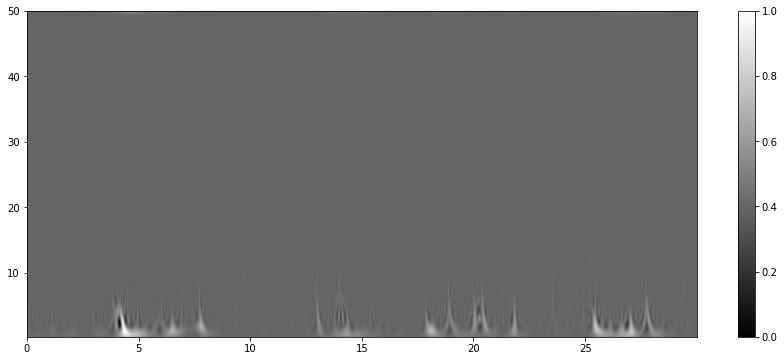

In [39]:
plt.figure(figsize=(15, 6))
plt.imshow(gray,cmap='gray',extent=[t.min(),t.max(),f.min(),50],aspect='auto', origin='lower')
plt.colorbar()

In [35]:
delta_band = (0, 4)  
theta_band = (4, 8)
alpha_band = (8, 12)
beta_band = (12, 30)
gamma_band = (30, 50)

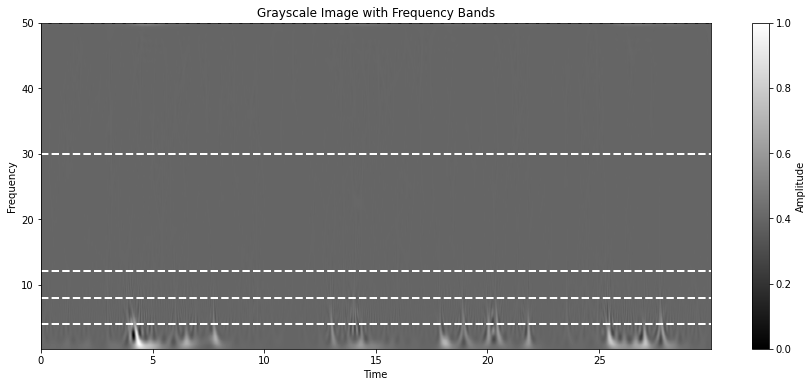

In [40]:
plt.figure(figsize=(15, 6))
plt.imshow(gray, cmap='gray', extent=[t.min(),t.max(),f.min(),50], aspect='auto', origin='lower')

plt.axhline(delta_band[1], color='w', linestyle='--', lw=2)
plt.axhline(theta_band[1], color='w', linestyle='--', lw=2)
plt.axhline(alpha_band[1], color='w', linestyle='--', lw=2)
plt.axhline(beta_band[1], color='w', linestyle='--', lw=2)
plt.axhline(gamma_band[1], color='w', linestyle='--', lw=2)

cbar = plt.colorbar(label='Amplitude')
plt.title("Grayscale Image with Frequency Bands")
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.show()

In [43]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(gray)
st = np.vectorize(lambda x: x >= thresh)
avi = st(gray)

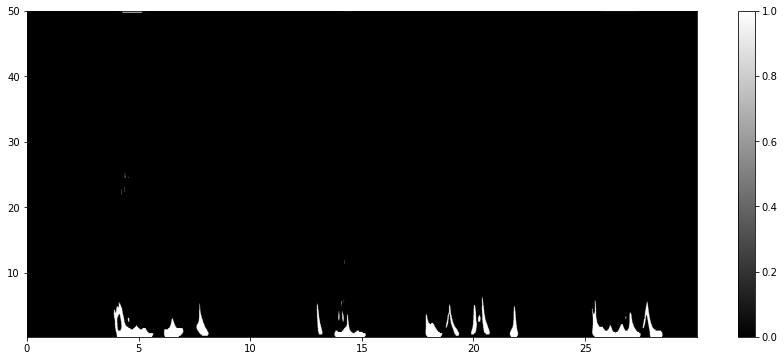

In [44]:
plt.figure(figsize=(15, 6))
plt.imshow(avi,cmap='gray',extent=[t.min(),t.max(),f.min(),50],aspect='auto', origin='lower')
plt.colorbar()

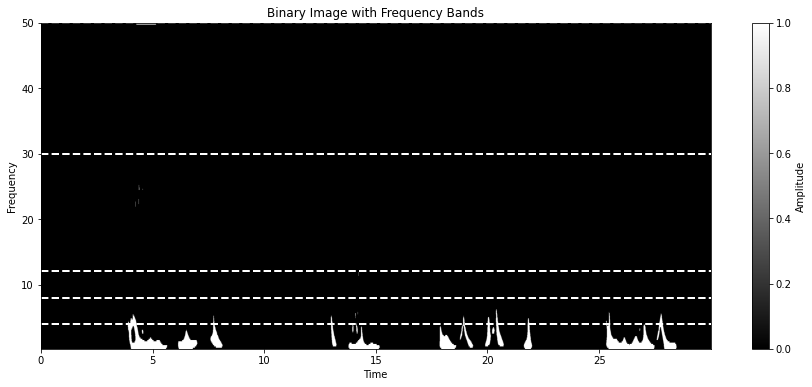

In [46]:
plt.figure(figsize=(15, 6))
plt.imshow(avi,cmap='gray',extent=[t.min(),t.max(),f.min(),50],aspect='auto', origin='lower')

plt.axhline(delta_band[1], color='w', linestyle='--', lw=2)
plt.axhline(theta_band[1], color='w', linestyle='--', lw=2)
plt.axhline(alpha_band[1], color='w', linestyle='--', lw=2)
plt.axhline(beta_band[1], color='w', linestyle='--', lw=2)
plt.axhline(gamma_band[1], color='w', linestyle='--', lw=2)

cbar = plt.colorbar(label='Amplitude')
plt.title("Binary Image with Frequency Bands")
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.show()

In [51]:
l = []
for i in range(15):
    li = []
    l.append(li)

Spread in the histogram of gray sub-images

In [52]:
from collections import Counter

d = np.around(gray[(f >= delta_band[0]) & (f <= delta_band[1])].flatten(),2)
t = np.around(gray[(f >= theta_band[0]) & (f <= theta_band[1])].flatten(),2)
a = np.around(gray[(f >= alpha_band[0]) & (f <= alpha_band[1])].flatten(),2)
b = np.around(gray[(f >= beta_band[0]) & (f <= beta_band[1])].flatten(),2)
g = np.around(gray[(f >= gamma_band[0]) & (f <= gamma_band[1])].flatten(),2)
sp_li = [d, t, a, b, g]
k = 2
for i in sp_li:
    num = 0
    den = 0
    cou = Counter(i)
    for j in cou:
        num += j * cou[j]
        den += cou[j]
    mu = num/den
    sp_num = 0
    for  j in cou:
        sp_num += cou[j]*((j-mu)**2)
    sp = sp_num/den
    l[k].append(sp)
    k+= 3

Maximum count of pixel intensity in the histogram of gray sub-images

In [53]:
out_li = [d, t, a, b, g]

j = 0
for i in range(len(out_li)):
    data = Counter(out_li[i])
    l[j].append(data.most_common(1)[0][1])
    j+=3

Aspect ratio in the histogram of binary sub-images

In [55]:
dbin = avi[(f >= delta_band[0]) & (f <= delta_band[1])]
tbin = avi[(f >= theta_band[0]) & (f <= theta_band[1])]
abin = avi[(f >= alpha_band[0]) & (f <= alpha_band[1])]
bbin = avi[(f >= beta_band[0]) & (f <= beta_band[1])]
gbin = avi[(f >= gamma_band[0]) & (f <= gamma_band[1])]

In [56]:
bi_li = [dbin, tbin, abin, bbin, gbin]
j = 1
for i in bi_li:
    i = i.flatten().astype(int)
    ar = (i==1).sum()/len(i)
    l[j].append(ar)
    j+= 3

In [59]:
print(len(l))
l

15


[[18332],
 [0.12951666666666667],
 [0.004961201501222219],
 [26302],
 [0.00705],
 [0.0003353601604166666],
 [29562],
 [4.761904761904762e-05],
 [0.00013787191531871993],
 [143248],
 [5.4347826086956524e-05],
 [0.00011612750503964496],
 [265159],
 [0.0013594771241830065],
 [4.745268773121447e-05]]

# DETAILED PLOT OF SEGMENTED PLOTA

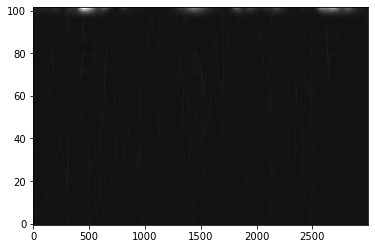

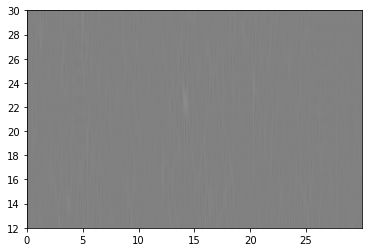

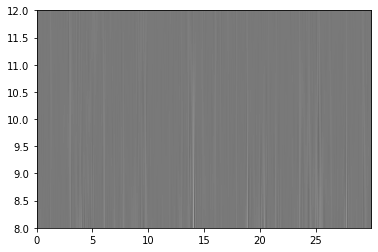

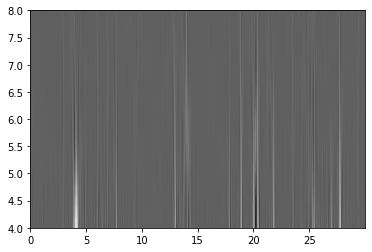

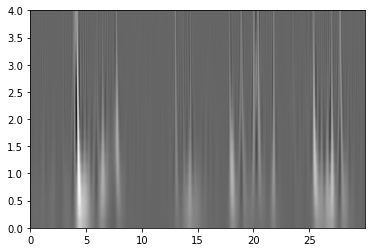

In [42]:
dsp = gray[(f >= delta_band[0]) & (f <= delta_band[1])]
tsp = gray[(f >= theta_band[0]) & (f <= theta_band[1])]
asp = gray[(f >= alpha_band[0]) & (f <= alpha_band[1])]
bsp = gray[(f >= beta_band[0]) & (f <= beta_band[1])]
gsp = gray[(f >= gamma_band[0]) & (f <= gamma_band[1])]

plt.imshow(gsp,cmap='gray',extent=[t.min(),t.max(),gamma_band[0],gamma_band[1]],aspect='auto', origin='lower')
plt.show()
plt.imshow(bsp,cmap='gray',extent=[t.min(),t.max(),beta_band[0],beta_band[1]],aspect='auto', origin='lower')
plt.show()
plt.imshow(asp,cmap='gray',extent=[t.min(),t.max(),alpha_band[0],alpha_band[1]],aspect='auto', origin='lower')
plt.show()
plt.imshow(tsp,cmap='gray',extent=[t.min(),t.max(),theta_band[0],theta_band[1]],aspect='auto', origin='lower')
plt.show()
plt.imshow(dsp,cmap='gray',extent=[t.min(),t.max(),delta_band[0],delta_band[1]],aspect='auto', origin='lower')
plt.show()

In [50]:
print(dsp, "\n")
print(dsp.shape)
print(tsp.shape)
print(asp.shape)
print(bsp.shape)
print(gsp.shape)

[[0.40120954 0.40325823 0.40653534 ... 0.39903772 0.40092116 0.3980286 ]
 [0.40120954 0.40320944 0.40652186 ... 0.39901682 0.40101509 0.3980286 ]
 [0.40120954 0.40315689 0.40649231 ... 0.39899477 0.40110825 0.3980286 ]
 ...
 [0.40120954 0.40194413 0.40424018 ... 0.39852447 0.40237584 0.3980286 ]
 [0.40120954 0.40183719 0.40398452 ... 0.39848472 0.40244938 0.3980286 ]
 [0.40120954 0.40172732 0.40371836 ... 0.39844415 0.40252129 0.3980286 ]] 

(20, 3000)
(20, 3000)
(21, 3000)
(92, 3000)
(102, 3000)


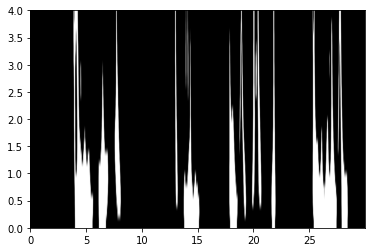

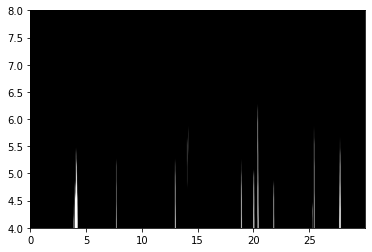

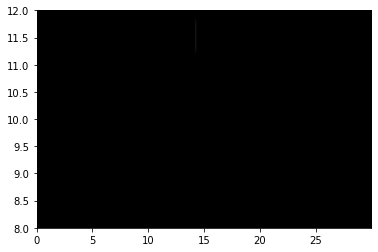

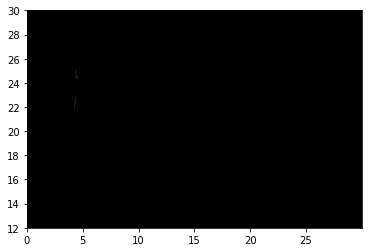

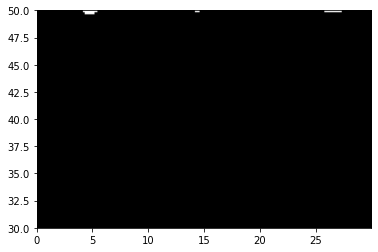

In [27]:
dbin = avi[(f >= delta_band[0]) & (f <= delta_band[1])]
tbin = avi[(f >= theta_band[0]) & (f <= theta_band[1])]
abin = avi[(f >= alpha_band[0]) & (f <= alpha_band[1])]
bbin = avi[(f >= beta_band[0]) & (f <= beta_band[1])]
gbin = avi[(f >= gamma_band[0]) & (f <= gamma_band[1])]

plt.imshow(dbin,cmap='gray',extent=[t.min(),t.max(),delta_band[0],delta_band[1]],aspect='auto', origin='lower')
plt.show()
plt.imshow(tbin,cmap='gray',extent=[t.min(),t.max(),theta_band[0],theta_band[1]],aspect='auto', origin='lower')
plt.show()
plt.imshow(abin,cmap='gray',extent=[t.min(),t.max(),alpha_band[0],alpha_band[1]],aspect='auto', origin='lower')
plt.show()
plt.imshow(bbin,cmap='gray',extent=[t.min(),t.max(),beta_band[0],beta_band[1]],aspect='auto', origin='lower')
plt.show()
plt.imshow(gbin,cmap='gray',extent=[t.min(),t.max(),gamma_band[0],gamma_band[1]],aspect='auto', origin='lower')
plt.show()
